# Customer Churn Analysis Project
Analysing customer churn data to identify key factors influencing customers to leave a service 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"../Data/Churn_Modelling.csv")

# Check the first 5 rows of the dataset
df.head()

# Check data types and missing values
df.info()

# Detect missing values
df.isnull().sum()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1.Overall Churn Rate Analysis
Review the number and proportion of customers who were retained compared to those who exited.


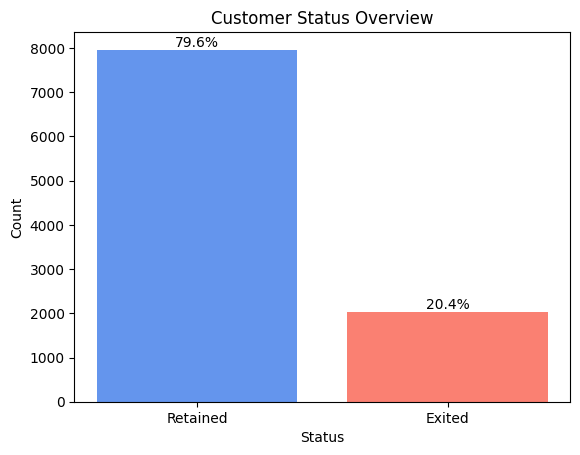

Exited =  2037
Retained =  7963


In [2]:
Churn_count = df[df['Exited'] == 1]
Retained = df[df['Exited'] == 0]
count = df["Exited"].value_counts().sort_index()
count.index = count.index.map({0: "Retained", 1: "Exited"})

total = count.sum()
percentages = (count / total) * 100

bars = plt.bar(count.index, count.values,color=["cornflowerblue", "salmon"])

plt.title("Customer Status Overview")
plt.xlabel("Status")
plt.ylabel("Count")
plt.bar_label(bars, labels=[f"{p:.1f}%" for p in percentages])
plt.show()

print(("Exited = "),len(Churn_count))
print(("Retained = "),len(Retained))


### 2. Analysis by Geography and Member Activity

Analysing customer churn by country to review churn rate percentages across geographies and compare churn rates between countries.

#### 2.1 Customers Churn Rate by Geography

| Country  | Churn Rate |
|----------|------------|
| France   | 16.15%     |
| Germany  | 32.44%     |
| Spain    | 16.67%     |

From the results, Germany has the highest churn rate, suggesting that customers in Germany are more likely to leave than those in France and Spain.


#### 2.2 Customers Churn Rate by Activity Status

In Part 2.2, a comparison is made between active and inactive members to examine how their engagement levels affect the churn rate.

**The results from the chart** 
* In every country, Inactive members are much more likely to leave. They quit at nearly double the rate compared of Active members.
* Germany has the highest churn in both groups. Even the Active members in Germany leave more often (23.7%) than Inactive members in France or Spain.
* Keeping customers active is very important to reduce churn. However, for Germany, we need to look for other reasons why they leave, as being active alone is not enough to keep them.

 Churn rate by Geography
Geography
France     16.15%
Germany    32.44%
Spain      16.67%
Name: Exited, dtype: object
Geography       France Germany   Spain
IsActiveMember                        
0               21.13%  41.08%  23.35%
1               11.50%  23.72%  10.75%


C:\Users\CPong\AppData\Local\Temp\ipykernel_9356\2680919530.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p_chart2 = sns.barplot(data=df, x='Geography', y=df['Exited']*100, hue='IsActiveMember', ci=None, palette=["salmon", "cornflowerblue"])


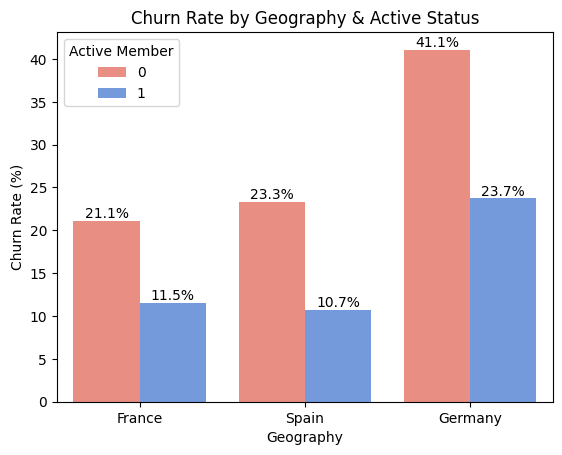

In [3]:
# Customer Churn by Geography
geography_churn = df.groupby('Geography')['Exited'].mean() * 100
geography_churn_percent = geography_churn.map(lambda x: f"{x:.2f}%")
print(" Churn rate by Geography")
print(geography_churn_percent)


# Customer Churn by Geography and Active Customers
active_churn = df.groupby(['IsActiveMember', 'Geography'])['Exited'].mean() * 100
active_churn = active_churn.map(lambda x: f"{x:.2f}%")
print(active_churn.unstack())

p_chart2 = sns.barplot(data=df, x='Geography', y=df['Exited']*100, hue='IsActiveMember', ci=None, palette=["salmon", "cornflowerblue"])

for container in p_chart2.containers:
    p_chart2.bar_label(container, fmt="%.1f%%")

plt.title('Churn Rate by Geography & Active Status')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Active Member',)
plt.show()

### 3. Customer Churn by Number of Products

In this section, churn rates across different product ownership groups are examined to determine whether churn varies by the number of products held

| Products | Churn Rate |
|----------|------------|
| 1        | ~27.7%     |
| 2        | ~7.6%      |
| 3        | ~82.7%     |
| 4        | 100%       |

From the result, Customers with **2 products** have the lowest churn rate, while Customers with **3 or 4 products** are extremely likely to leave.

#### Data Visualization
A bar chart is used to show the percentage difference between customers who retained and who exited across product counts.

#### The Result from the Chart 
* Customers with 2 products are the most loyal, with the lowest churn rate of only 7.6%.
* Customers with 3 products have a very high churn rate (82.7%), and 100% of customers with 4 products have churned
* The data suggests that customers with too many products might be experiencing issues or dissatisfaction with complex services, leading to a higher churn rate.

Churn rate by Numbers of product
NumOfProducts
1     27.71%
2      7.58%
3     82.71%
4    100.00%
Name: Exited, dtype: object


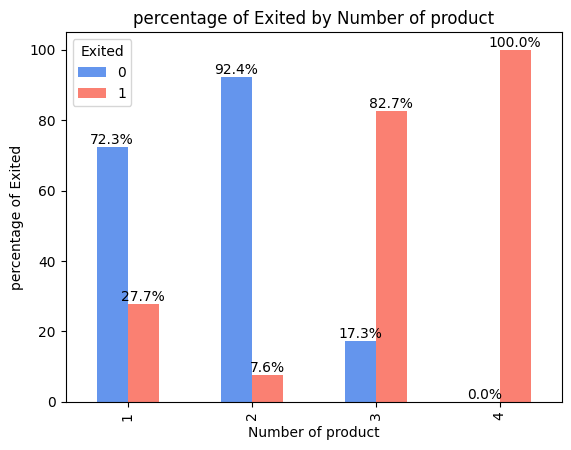

In [4]:
#Customer Churn by Number of Products
product_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100
product_churn_percent = product_churn.map(lambda x: f"{x:.2f}%")
print("Churn rate by Numbers of product")
print(product_churn_percent)

chart = pd.crosstab(df["NumOfProducts"],df["Exited"],normalize="index")*100
p_chart3=chart.plot(kind="bar",color=("cornflowerblue","salmon"))

for container in p_chart3.containers:
    p_chart3.bar_label(container, fmt="%.1f%%")

plt.title("percentage of Exited by Number of product")
plt.ylabel("percentage of Exited")
plt.xlabel("Number of product")
plt.show()

### 4. Customer Churn by Age Group
An age distribution (KDE Plot) is used to visualize which age groups are more likely to stay or leave.

The data shows that middle-aged customers are more likely to leave than younger customers, possibly because the services do not match their needs.

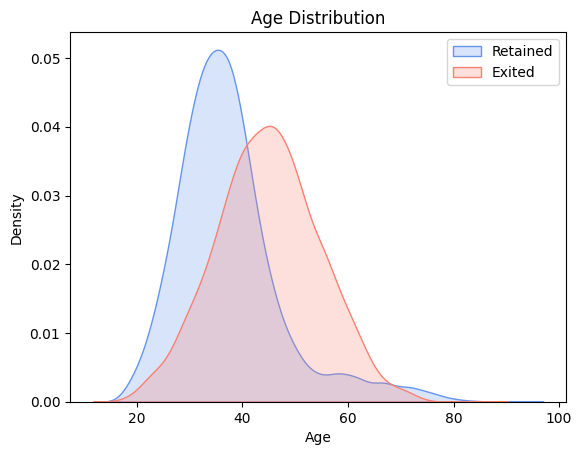

In [6]:
# Customer Churn by Age Group
sns.kdeplot(df[df['Exited'] == 0]['Age'], fill=True, label='Retained', color='cornflowerblue')
sns.kdeplot(df[df['Exited'] == 1]['Age'], fill=True, label='Exited', color='salmon')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Summary 
Customers in Germany have the highest churn rate. Special attention is needed for this region.

Product Risk: Customers with 3 products have a very high churn rate at 82.7%, and 100% of customers with 4 products have churned.

Customers aged 40 to 60 are the most likely to leave.

Inactive members leave at double the rate of active members.

### Recommendations

**Focus on Germany**
Investigate why German customers are unhappy. Determine whether the issue is stronger competition in the market or poor service quality in that region.

**Address Product Complexity**
The data suggests that customers with too many products may be experiencing issues or dissatisfaction due to complex services. The bank should focus on better supporting customers who hold 3–4 products.

**Re-engage Inactive Members**
Use personalized promotions to re-engage inactive customers and encourage more consistent usage.

**Target Older Customers**
Develop special loyalty programs or tailored financial products specifically for customers aged 45 and above
